In [1]:
import os
import pandas as pd
import numpy as  np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

from keras.utils.np_utils import to_categorical
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense,Conv2D,Flatten,MaxPool2D,Dropout,BatchNormalization
from keras.optimizers import RMSprop,Adam
from keras.callbacks import ReduceLROnPlateau

Using TensorFlow backend.


In [2]:
train=pd.read_csv('D:/APSS/Deep Learning/Kannada-MNIST/train.csv')
test=pd.read_csv('D:/APSS/Deep Learning/Kannada-MNIST/test.csv')
sample_sub=pd.read_csv('D:/APSS/Deep Learning/Kannada-MNIST/sample_submission.csv')

In [3]:
print('The Train  dataset has {} rows and {} columns'.format(train.shape[0],train.shape[1]))
print('The Test  dataset has {} rows and {} columns'.format(test.shape[0],test.shape[1]))

The Train  dataset has 60000 rows and 785 columns
The Test  dataset has 5000 rows and 785 columns


In [4]:
train.head(3)

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
test.head(3)

,id,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
test=test.drop('id', axis=1)
test.head(3)

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


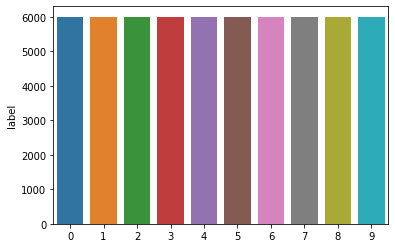

In [7]:
y=train.label.value_counts()
sns.barplot(y.index,y)

In [8]:
X_train=train.drop('label',axis=1)
Y_train=train.label

In [9]:
X_train=X_train/255
test=test/255

In [10]:
X_train=X_train.values.reshape(-1,28,28,1)
test=test.values.reshape(-1,28,28,1)

In [11]:
print('The shape of train set now is',X_train.shape)
print('The shape of test set now is',test.shape)

The shape of train set now is (60000, 28, 28, 1)
The shape of test set now is (5000, 28, 28, 1)


In [12]:
Y_train=to_categorical(Y_train)

In [13]:
X_train,X_test,y_train,y_test=train_test_split(X_train,Y_train,random_state=42,test_size=0.15)

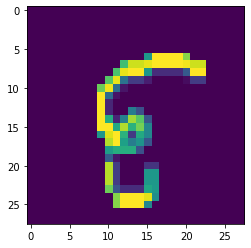

In [14]:
plt.imshow(X_train[0][:,:,0])

In [15]:
datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range=10,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.1, # Randomly zoom image 
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=False,  # randomly flip images
        vertical_flip=False)  # randomly flip images


datagen.fit(X_train)

In [16]:
model = Sequential()

model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu', input_shape = (28,28,1)))
model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu'))
model.add(BatchNormalization(momentum=.15))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))


model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model.add(BatchNormalization(momentum=0.15))
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu', input_shape = (28,28,1)))
model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu'))
model.add(BatchNormalization(momentum=.15))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))

In [17]:
model.add(Flatten())
model.add(Dense(256, activation = "relu"))
model.add(Dropout(0.4))
model.add(Dense(10, activation = "softmax"))

In [18]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 32)        832       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 28, 28, 32)        25632     
_________________________________________________________________
batch_normalization_1 (Batch (None, 28, 28, 32)        128       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 14, 14, 64)        18496     
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 14, 14, 64)       

In [19]:
optimizer=Adam(learning_rate=0.001,beta_1=0.9,beta_2=0.999)

In [20]:
model.compile(optimizer=optimizer,loss=['categorical_crossentropy'],metrics=['accuracy'])

In [21]:
learning_rate_reduction = ReduceLROnPlateau(monitor='val_acc', 
                                            patience=3, 
                                            verbose=1, 
                                            factor=0.5, 
                                            min_lr=0.00001)

In [22]:
epochs=10 #change this to 30 if you need to get better score
batch_size=64

In [23]:
history = model.fit_generator(datagen.flow(X_train,y_train, batch_size=batch_size),
                              epochs = epochs, validation_data = (X_test,y_test),
                              verbose = 2, steps_per_epoch=X_train.shape[0] // batch_size
                              , callbacks=[learning_rate_reduction])

Epoch 1/10
 - 264s - loss: 0.2692 - accuracy: 0.9139 - val_loss: 0.0363 - val_accuracy: 0.9896
Epoch 2/10


C:\Users\DELL\Anaconda3\lib\site-packages\keras\callbacks\callbacks.py:1042: RuntimeWarning: Reduce LR on plateau conditioned on metric `val_acc` which is not available. Available metrics are: val_loss,val_accuracy,loss,accuracy,lr
  (self.monitor, ','.join(list(logs.keys()))), RuntimeWarning


 - 266s - loss: 0.0630 - accuracy: 0.9810 - val_loss: 0.0358 - val_accuracy: 0.9899
Epoch 3/10
 - 261s - loss: 0.0500 - accuracy: 0.9856 - val_loss: 0.0235 - val_accuracy: 0.9938
Epoch 4/10
 - 259s - loss: 0.0448 - accuracy: 0.9869 - val_loss: 0.0235 - val_accuracy: 0.9934
Epoch 5/10
 - 259s - loss: 0.0387 - accuracy: 0.9889 - val_loss: 0.0244 - val_accuracy: 0.9929
Epoch 6/10
 - 258s - loss: 0.0347 - accuracy: 0.9899 - val_loss: 0.0262 - val_accuracy: 0.9927
Epoch 7/10
 - 258s - loss: 0.0315 - accuracy: 0.9904 - val_loss: 0.0172 - val_accuracy: 0.9944
Epoch 8/10
 - 1530s - loss: 0.0291 - accuracy: 0.9917 - val_loss: 0.0176 - val_accuracy: 0.9951
Epoch 9/10
 - 357s - loss: 0.0322 - accuracy: 0.9910 - val_loss: 0.0207 - val_accuracy: 0.9944
Epoch 10/10
 - 352s - loss: 0.0276 - accuracy: 0.9920 - val_loss: 0.0148 - val_accuracy: 0.9961


In [24]:
''''history = model.fit_generator(
   train_generator, 
    epochs=35,
    validation_data=validation_generator,
    validation_steps=12,
    steps_per_epoch=500,
    callbacks=callbacks
)'''''

"'history = model.fit_generator(\n   train_generator, \n    epochs=35,\n    validation_data=validation_generator,\n    validation_steps=12,\n    steps_per_epoch=500,\n    callbacks=callbacks\n)"

Text(0, 0.5, 'accuracy')

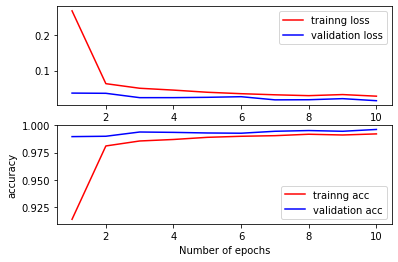

In [25]:
fig,ax=plt.subplots(2,1)
fig.set
x=range(1,1+epochs)
ax[0].plot(x,history.history['loss'],color='red')
ax[0].plot(x,history.history['val_loss'],color='blue')

ax[1].plot(x,history.history['accuracy'],color='red')
ax[1].plot(x,history.history['val_accuracy'],color='blue')
ax[0].legend(['trainng loss','validation loss'])
ax[1].legend(['trainng acc','validation acc'])
plt.xlabel('Number of epochs')
plt.ylabel('accuracy')


In [26]:
y_pre_test=model.predict(X_test)
y_pre_test=np.argmax(y_pre_test,axis=1)
y_test=np.argmax(y_test,axis=1)

In [27]:
conf=confusion_matrix(y_test,y_pre_test)
conf=pd.DataFrame(conf,index=range(0,10),columns=range(0,10))

In [28]:
conf

,0,1,2,3,4,5,6,7,8,9
0,850,8,0,0,0,0,0,0,0,0
1,0,913,0,0,0,0,0,0,0,0
2,3,0,904,0,0,0,0,1,0,0
3,1,0,0,882,0,0,0,7,0,0
4,0,0,0,0,922,2,0,0,1,1
5,0,0,0,1,1,872,0,0,0,0
6,0,0,0,0,0,0,860,2,0,0
7,0,0,0,0,0,0,1,932,0,0
8,0,0,0,0,0,0,0,0,918,0
9,0,0,0,0,1,0,5,0,0,912


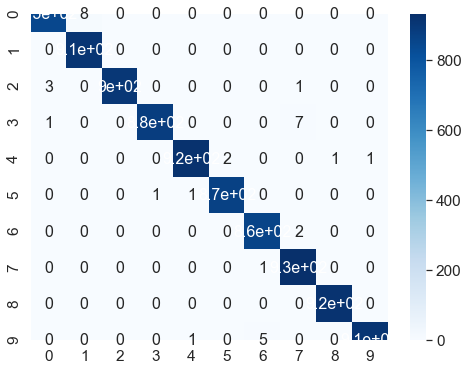

In [29]:
plt.figure(figsize=(8,6))
sns.set(font_scale=1.4)#for label size
sns.heatmap(conf, annot=True,annot_kws={"size": 16},cmap=plt.cm.Blues)

In [30]:
x=(y_pre_test-y_test!=0).tolist()
x=[i for i,l in enumerate(x) if l!=False]

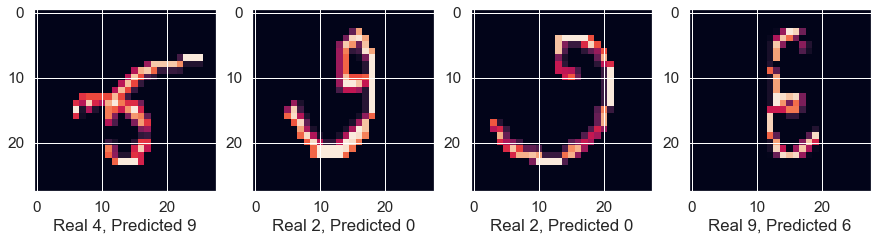

In [31]:
fig,ax=plt.subplots(1,4,sharey=False,figsize=(15,15))

for i in range(4):
    ax[i].imshow(X_test[x[i]][:,:,0])
    ax[i].set_xlabel('Real {}, Predicted {}'.format(y_test[x[i]],y_pre_test[x[i]]))

In [32]:
test=pd.read_csv('D:/APSS/Deep Learning/Kannada-MNIST/test.csv')

In [33]:
test_id=test.id

test=test.drop('id',axis=1)
test=test/255
test=test.values.reshape(-1,28,28,1)

In [34]:
test.shape

(5000, 28, 28, 1)

In [35]:
y_pre=model.predict(test)     ##making prediction
y_pre=np.argmax(y_pre,axis=1) ##changing the prediction intro labels

In [36]:
y_pre

array([3, 0, 2, ..., 1, 6, 3], dtype=int64)

In [37]:
sample_sub['label']=y_pre
sample_sub.to_csv('submission.csv',index=False)

In [38]:
sample_sub.head()

,id,label
0,0,3
1,1,0
2,2,2
3,3,6
4,4,7
